In [1]:
from getpass import getpass
from dotenv import load_dotenv
import pandas as pd
import requests
import os
import folium
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def foursquare_access():
    load_dotenv()
    token = os.getenv("token")
    return token

In [3]:
def category_from_foursquare (lat, lon, category):

    url = f"https://api.foursquare.com/v3/places/search?&ll={lon}%2C{lat}&categories={category}&sort=DISTANCE&limit=1"
    
    headers = {
        "accept": "application/json",
        "Authorization": token
    }

    response = requests.get(url, headers=headers).json()
    return response

In [4]:
def query_from_foursquare (query, lat, lon):
    
    url = f"https://api.foursquare.com/v3/places/search?query={query}&ll={lon}%2C{lat}&sort=DISTANCE&limit=1"

    headers = {
        "accept": "application/json",
        "Authorization": token
    }

    response = requests.get(url, headers=headers).json()
    return response

In [5]:
def everything_from_foursquare (one_element, data):

    name = one_element["name"]
    lat = one_element["geocodes"]["main"]["latitude"]
    lon = one_element["geocodes"]["main"]["longitude"]
    distance = one_element["distance"]
    
    dict_ = {"name": name, "latitude": lat, "longitude": lon, "data": data, "distance": distance}
    
    return dict_

In [6]:
def df_foursquare(df, lat, lon, city):
    
    category_dict={"Airport": "19040", "Preschool":"12056", "Primary and Secondary School":"12057", "Train Station":"19046",
                   "Night Clubs":"10032", "Vegan Restaurant":"13377", "Basketball Stadium":"18008"}
    
    query_list=["Starbucks","Dog Grooming"]
    
        
    for key, value in category_dict.items():
        response=category_from_foursquare(lon, lat, value)
        new_list = []
        for i in response["results"]:
            new_list.append(everything_from_foursquare (i, key))

        df1 = pd.DataFrame(new_list)
        df = pd.concat([df, df1])
                
                
    for query in query_list:
        response=query_from_foursquare (query,lon, lat)
        new_list = []
        for i in response["results"]:
            new_list.append(everything_from_foursquare (i, query))

        df1 = pd.DataFrame(new_list)
        df = pd.concat([df, df1])    
    
    if city == "London":
        df.loc[len(df)] = ["Jessica's Dog Grooming", "51.5141844", "-0.1863357", "Dog Grooming", 1500.0]
    
    df['city'] = city
    
    df.reset_index(drop=True, inplace=True)
    
    return df

In [7]:
token = foursquare_access()

In [8]:
df_sf = pd.read_csv("../dataframes/df_sanfrancisco.csv")
df_sf = df_foursquare(df_sf, "37.7968917","-122.4032027", "San Francisco") 
df_sf.to_csv("../dataframes/df_sanfrancisco.csv", index=False)

df_lon = pd.read_csv("../dataframes/df_london.csv")
df_lon = df_foursquare(df_lon, "51.513248",'-0.154738', "London")
df_lon.to_csv("../dataframes/df_london.csv", index=False)

df_nyc = pd.read_csv("../dataframes/df_newyork.csv")
df_nyc = df_foursquare(df_nyc, '40.7398872','-73.9850319', "New York") 
df_nyc.to_csv("../dataframes/df_newyork.csv", index=False)


In [9]:
df_sf

,name,latitude,longitude,data,distance,city
0,Digg,37.764726,-122.394523,Design company,NaN,San Francisco
1,Wix,37.756720,-122.405070,Design company,NaN,San Francisco
2,99designs,37.795531,-122.400598,Design company,NaN,San Francisco
3,Minted,37.797435,-122.403175,Design company,NaN,San Francisco
4,Netbiscuits,37.755037,-122.426442,Design company,NaN,San Francisco
5,Oakland International Airport (OAK),37.712395,-122.213323,Airport,19161.0,San Francisco
6,Imane's Wonderschool,37.780740,-122.407515,Preschool,1834.0,San Francisco
7,Jean Parker Elementary School,37.797687,-122.411024,Primary and Secondary School,693.0,San Francisco
8,Montgomery St BART Station,37.788862,-122.402116,Train Station,888.0,San Francisco
9,Monroe,37.797885,-122.405014,Night Clubs,210.0,San Francisco


In [10]:
df_lon

,name,latitude,longitude,data,distance,city
0,Netbiscuits,51.513248,-0.154738,Design company,NaN,London
1,Moonfruit,51.51913,-0.11016,Design company,NaN,London
2,London City Airport (LCY),51.504029,0.049552,Airport,14166.0,London
3,Home Star Childcare,51.513242,-0.141109,Preschool,942.0,London
4,Netley Primary School,51.527677,-0.140121,Primary and Secondary School,1910.0,London
5,Marble Arch,51.513632,-0.158366,Train Station,248.0,London
6,Annabel's,51.509132,-0.146903,Night Clubs,701.0,London
7,Plants by De,51.513315,-0.15004,Vegan Restaurant,316.0,London
8,Tabard Gardens - Basketball Court,51.514811,-0.174869,Basketball Stadium,1397.0,London
9,Starbucks,51.514326,-0.152723,Starbucks,241.0,London


In [11]:
df_nyc

,name,latitude,longitude,data,distance,city
0,Gilt Groupe,40.747270,-73.980064,Design company,NaN,New York
1,Squarespace,40.720810,-74.000870,Design company,NaN,New York
2,Banyan Branch,40.695170,-73.932300,Design company,NaN,New York
3,Netbiscuits,40.695170,-73.932300,Design company,NaN,New York
4,LaGuardia Airport (LGA),40.774527,-73.871941,Airport,10447.0,New York
5,Metrokids Preschool,40.748664,-73.970435,Preschool,1563.0,New York
6,Xavier High School,40.738023,-73.994868,Primary and Secondary School,841.0,New York
7,MTA Subway - 23rd St,40.740187,-73.986656,Train Station,122.0,New York
8,Hidden Lane Bar,40.734657,-73.987662,Night Clubs,623.0,New York
9,24th St Vegan Cafe,40.738894,-73.980623,Vegan Restaurant,356.0,New York


In [12]:
def best_locations_df(df_nyc, df_sf, df_lon):

    dfs = (df_nyc, df_sf, df_lon)
    cities = ["New York", "San Francisco", "London"]
    data= ["Airport", "Preschool", "Primary and Secondary School", "Train Station", "Night Clubs", "Vegan Restaurant", 
          "Basketball Stadium", "Starbucks", "Dog Grooming"]

    distance_dict= {}

    for i in data:
        distance_dict[i] = {}
        for df, city in zip(dfs, cities):
            distance_value = df.loc[df['data'] == i, 'distance'].values[0]
            distance_dict[i][city] = distance_value

    df = pd.DataFrame(distance_dict, index=["New York", "San Francisco", "London"])
    return df

In [13]:
df=best_locations_df(df_nyc, df_sf, df_lon)

In [14]:
def distance_locations_plot(df):

    fig, ax = plt.subplots()

    columns = [col for col in df.columns if col != 'Airport']
    values = df.loc[:, columns].values

    colors = ['#FFC107', '#FF4081', '#536DFE']  
    bar_width = 0.25 

    for i, city in enumerate(df.index):
        pos = [j + bar_width*i for j in range(len(columns))]  # Posición de las barras
        ax.bar(pos, values[i], width=bar_width, alpha=0.7, color=colors[i], label=city)

    ax.legend()
    ax.set_title('Distance between city locations and places',fontweight='bold')


    ax.set_xticks([j + bar_width for j in range(len(columns))])
    ax.set_xticklabels(columns, rotation=45, ha='right')
    ax.set_ylabel('Distance (meters)')

    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)

    plt.show()

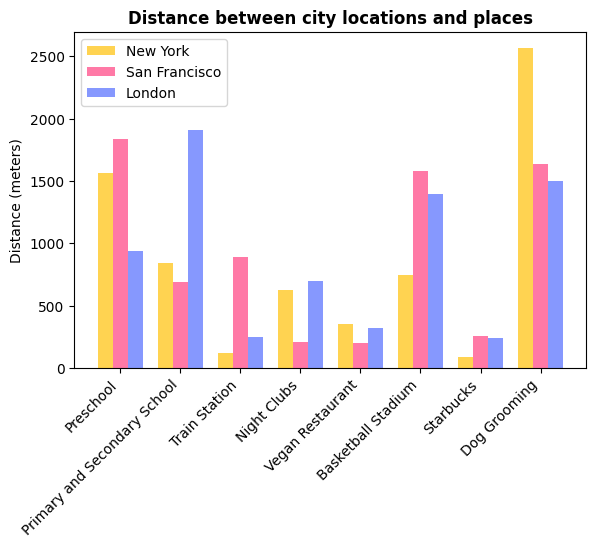

In [15]:
distance_locations_plot(df)

In [16]:
def closest_distance_points(df):
    for column in df.columns:
        sorted_values = df[column].sort_values(ascending=False)
        df[column] = df[column].apply(lambda x: 2 if x == sorted_values.iloc[2] else 1 if x == sorted_values.iloc[1] else 0)

    return df

In [17]:
df

,Airport,Preschool,Primary and Secondary School,Train Station,Night Clubs,Vegan Restaurant,Basketball Stadium,Starbucks,Dog Grooming
New York,10447.0,1563.0,841.0,122.0,623.0,356.0,749.0,91.0,2569.0
San Francisco,19161.0,1834.0,693.0,888.0,210.0,203.0,1580.0,257.0,1639.0
London,14166.0,942.0,1910.0,248.0,701.0,316.0,1397.0,241.0,1500.0


In [18]:
df=closest_distance_points(df)

In [19]:
def cities_grades_plot(df):

    grade = ((df.sum(axis=1)/18)*9).round(1)

    fig, ax = plt.subplots()

    colors = ['#FFC107', '#FF4081', '#536DFE']
    bar_width = 0.5  
    ax.bar(grade.index, grade, width=bar_width, alpha=0.7, color=colors)

    for i, val in enumerate(grade):
        ax.text(i, val -1 , str(val), ha= "center",color='black', size=14)

    ax.set_title("Best requirements per location", fontsize=14, fontweight='bold')
    ax.set_ylabel('Requirements (9 in total)', fontsize=12)

    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)

    plt.show()

# the best city is New York!

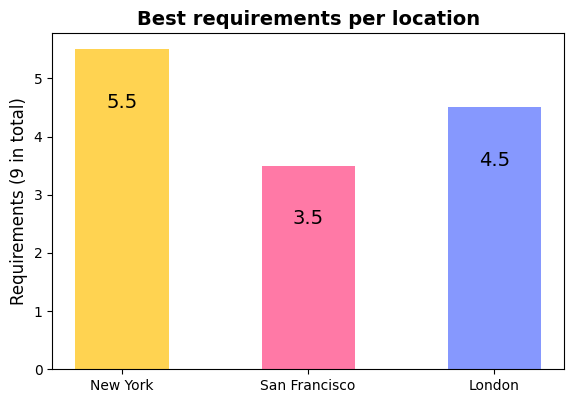

In [20]:
cities_grades_plot(df)